In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, add

from tensorflow.keras.models import Sequential 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
#загружаем датасет
data = pd.read_csv("/content/drive/MyDrive/vino/winequality-red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [7]:
#размерность выборки
data.shape 

(1599, 12)

In [9]:
#вывод информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#статистика столбцов
data.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [11]:
#возвращает кол-во уникальных значений качества вина
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#####Большая часть данных вина сосредоточена с качеством 5,6,7

In [12]:
#обнаружение пустых значений
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#####Не обнаружено пустых значений

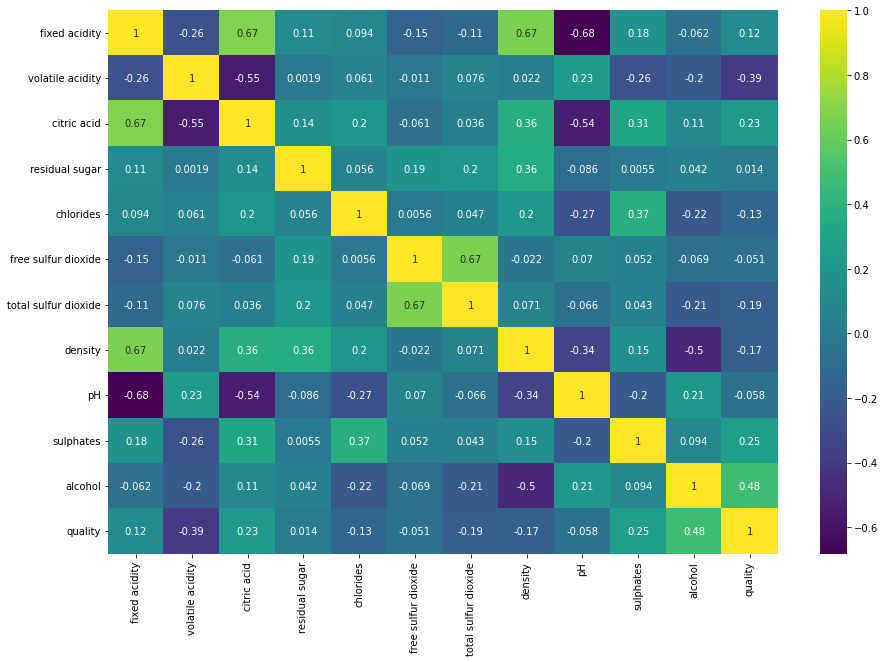

In [13]:
#строим тепловую карту корреляции для определения значимых параметров
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap = 'viridis', annot=True) 

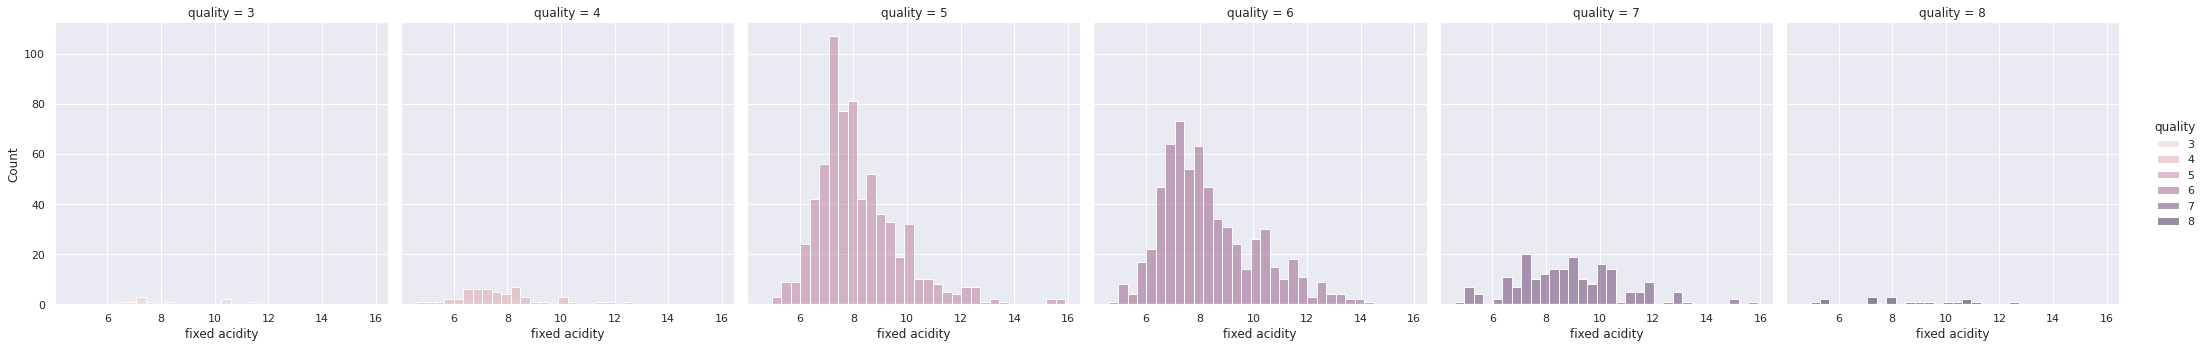

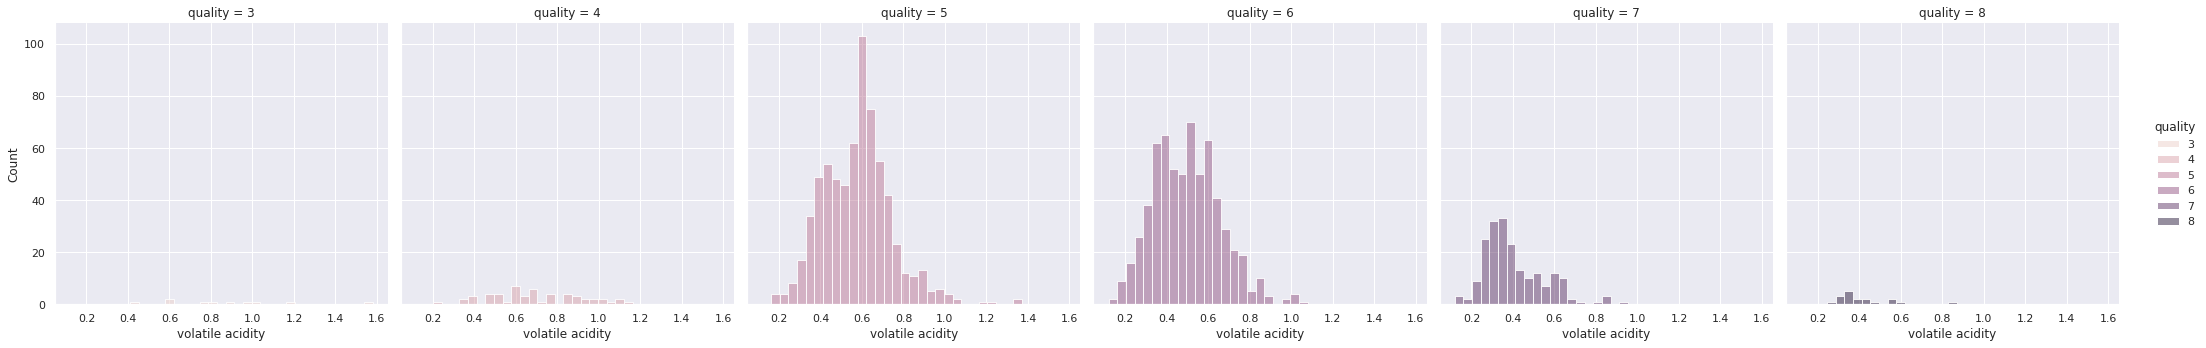

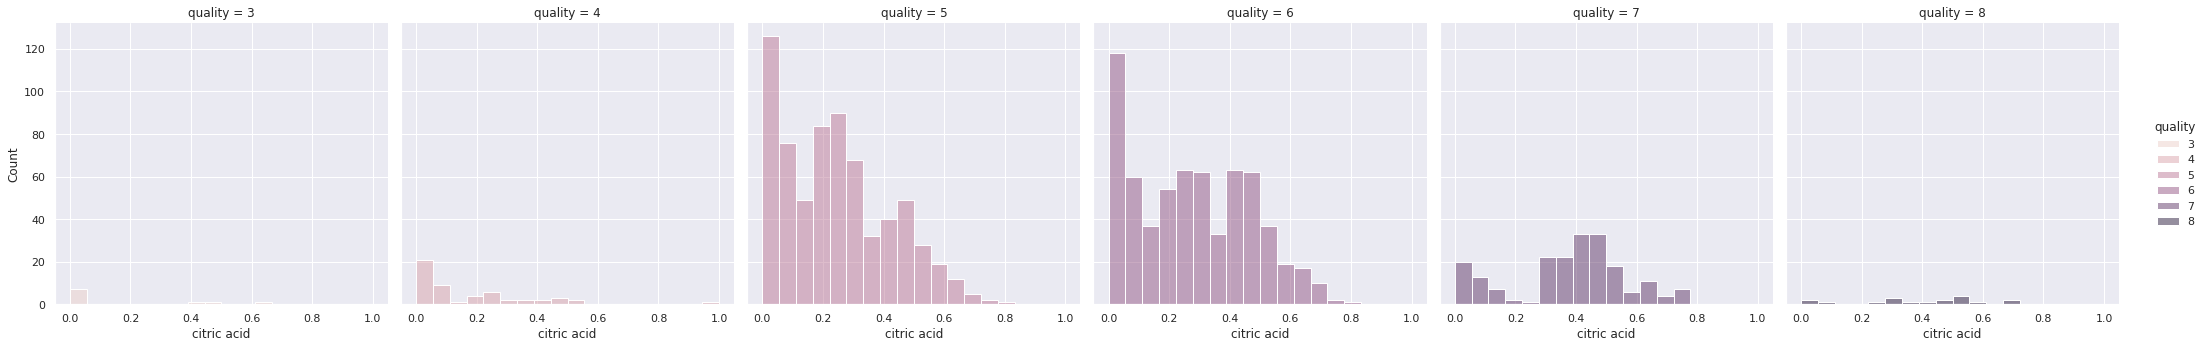

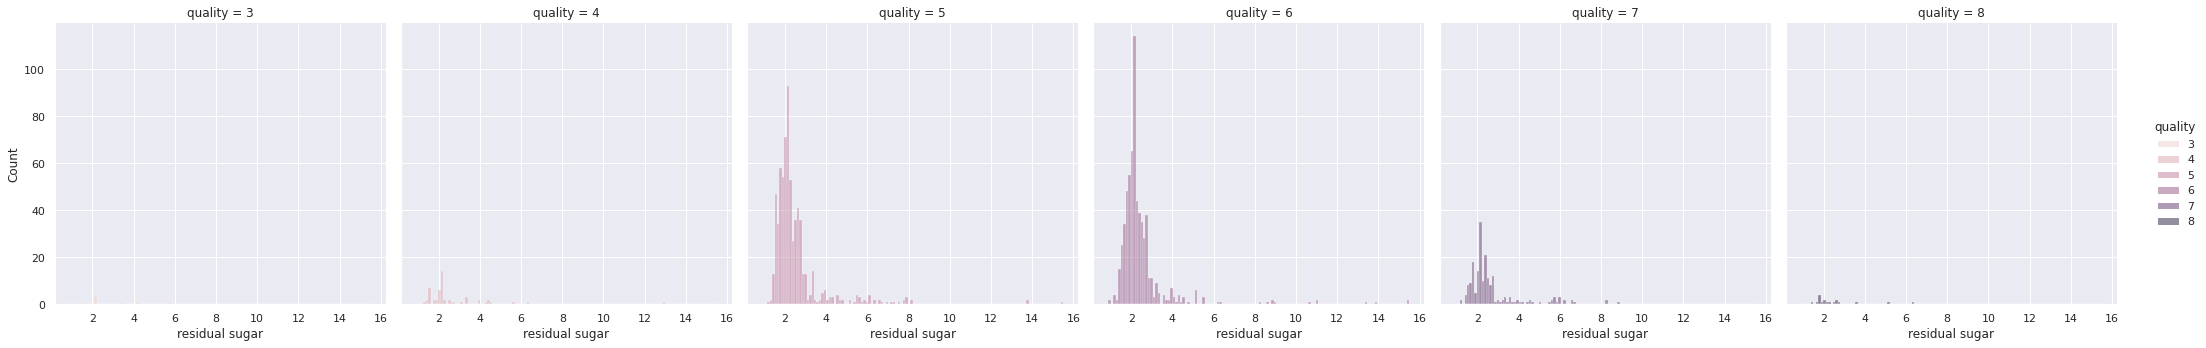

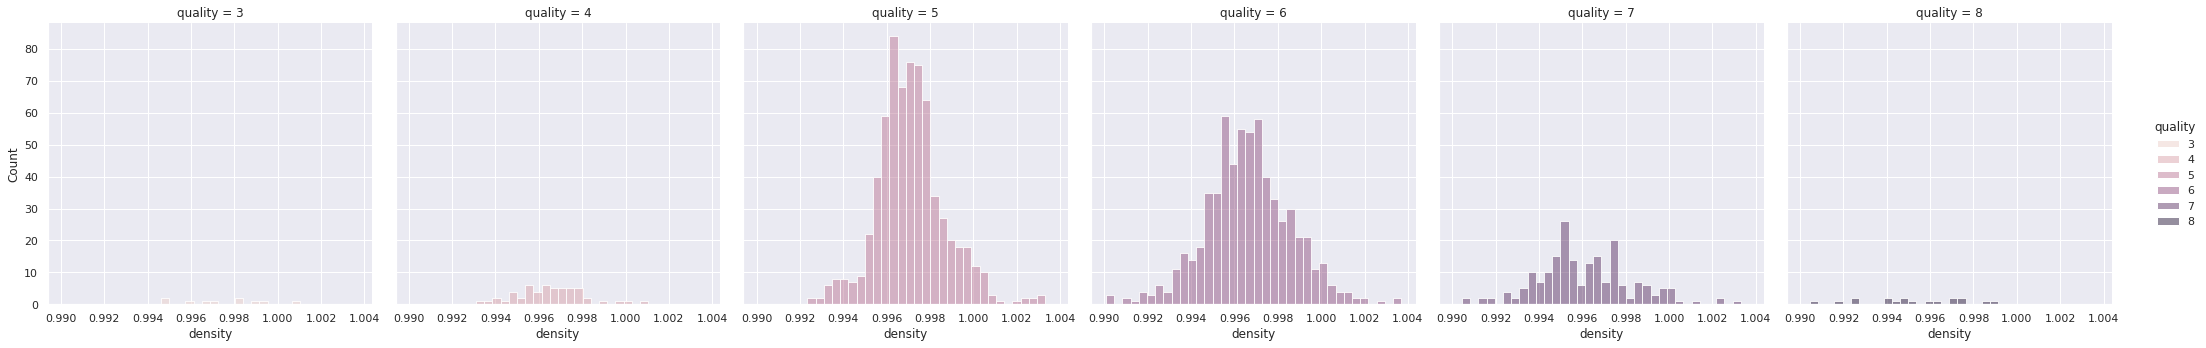

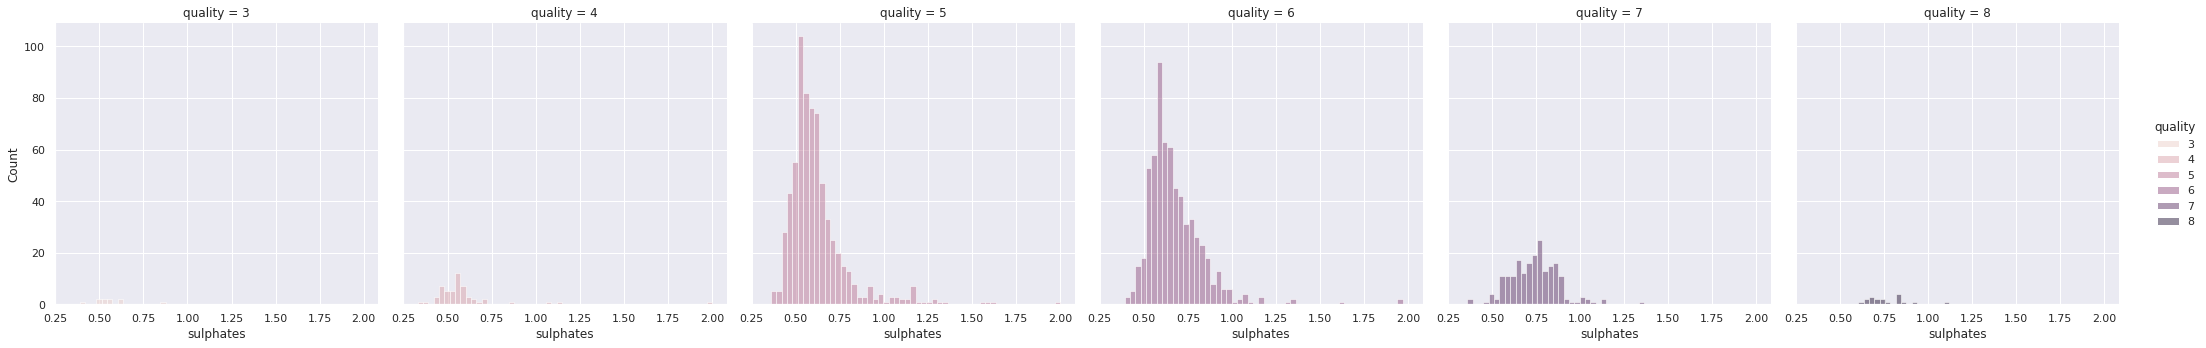

In [14]:
#визуализация распределения данных
sns.set()
for i in list(data.drop("quality", axis=1)):
    sns.displot(data=data, x=i, hue="quality", col="quality")

In [15]:
data['quality'].replace(to_replace={3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}, inplace=True)

In [16]:
#определение функций и цели
X = data[['fixed acidity',
               'volatile acidity',
               'citric acid',
               'residual sugar',
               'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol']]

y = data['quality']

In [17]:
#разделение данных для моделирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
#по визуализации мы видим, что данные искажены
#делаем масштабирование функций
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = Sequential(name="model")

model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 71,434
Trainable params: 71,434
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, 
               y_train, 
               validation_data=(X_test, y_test), 
               batch_size=35, 
               epochs=80)

Epoch 1/80
42/42 [==============================] - 1s 7ms/step - loss: 2.0140 - accuracy: 0.3628 - val_loss: 1.7557 - val_accuracy: 0.4688
Epoch 2/80
42/42 [==============================] - 0s 3ms/step - loss: 1.6002 - accuracy: 0.5066 - val_loss: 1.4432 - val_accuracy: 0.4688
Epoch 3/80
42/42 [==============================] - 0s 3ms/step - loss: 1.3622 - accuracy: 0.5400 - val_loss: 1.2778 - val_accuracy: 0.5562
Epoch 4/80
42/42 [==============================] - 0s 3ms/step - loss: 1.2350 - accuracy: 0.5546 - val_loss: 1.1923 - val_accuracy: 0.6062
Epoch 5/80
42/42 [==============================] - 0s 3ms/step - loss: 1.1599 - accuracy: 0.5691 - val_loss: 1.1532 - val_accuracy: 0.5625
Epoch 6/80
42/42 [==============================] - 0s 2ms/step - loss: 1.1135 - accuracy: 0.5664 - val_loss: 1.1181 - val_accuracy: 0.6000
Epoch 7/80
42/42 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.5719 - val_loss: 1.0965 - val_accuracy: 0.5938
Epoch 8/80
42/42 [==

In [21]:
model.evaluate(X_test, y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.9589 - accuracy: 0.6062


0.606249988079071

In [22]:
#построение графика ошибок при обучении
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#####Мы видим, что ошибки на обучении уменьшаются с увеличением количества эпох

In [23]:
#построение графика точности при обучении
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#####Мы видим, что точность на обучении увеличивается с увеличением количества эпох